# Tutorial on the essentials of gravitational wave detection (2020)

This tutorial focuses on an idealized detection of gravitational waves emitted during the inspiral and merger of compact binary objects. The used data are synthetic, and the templates use the approximations described by VIRGO and LIGO in Ann. Phys. 529 (2017).

### Exercise 1: Gravitational wave signals

We focus on the inspiral and merger of two objects, e.g. two black holes or two neutron stars. From the masses $m_1$ and $m_2$, we define the total mass $M = m_1 + m_2$ and the reduced mass,

$$ \eta = \frac{m_1 m_2}{M^2} $$

Let then $D$ be the (luminosity-)distance of the event, and let $A$ be a geometric prefactor which depends on the relative orietnation between the merging system and the interferometric detector. (Averaging over all angles, one has $A = 2/5$.

The natural data domain of graviational wave interferometers is the time domain: The interferometers detect a strain $h$, as a function of time $t$. A gravitational wave signal from a binary merger can be represented in the time domain as

1) **Scaling relations**: Explain why the amplitude of the strain increases proportional to $\eta$, M and A, and why it decreases inversely with D.

**Answer**:

$\eta$:

$M$:

$A$:

$D$: It decreases inversely with $D$, instead of $D^2$, because the amplitude scales with energy squared.

2) **Chirping**: Employ Keplerian dynamics to explain how the ‘chirping’ of gravitational waves arises. Chirping describes the increase of frequency $f$ as a function of time.

**Answer**: Because they attract eachother, so they get closer, and rotate faster around eachother. So the period of them orbiting eachother becomes shorter and therefore the frequency goes up.

$$ \frac{a^3}{T^2} = \text{ constant} $$

$$ f = \frac{1}{t} $$

The orbit $a$ goes down, so $T$ goes down, so $f$ goes up.

3) **Computing the chirpline**: We introduce the `*chirp mass*' as

$$ \mathcal{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}} $$

Plot the chirplines Eq. (6) for different masses $x$ and merger times $t_c$. You will recognize the typical upsweep in frequency prior to merger, as also visible in the orignal LIGO data, see Fig. 1.

In [143]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# Variables/constants.
M_sun = 2e30 # Mass of the sun, kg.
B = 16.6 # Some constant, s^(-5/8)
t_c = 1 # Moment of merger, s.
x = np.linspace(20,40,5) # Mass, kg.
t = np.linspace(0,1-0.005,100) # Time (before moment of merger), s.

In [145]:
# Chirpline function.
def f_GW(x,t,B,t_c):
    return B * x**(-5/8) * (t_c - t)**(-3/8)

In [146]:
chirplines = []
for i in range(len(x)):
    chirplines.append(f_GW(x[i],t,B,t_c))

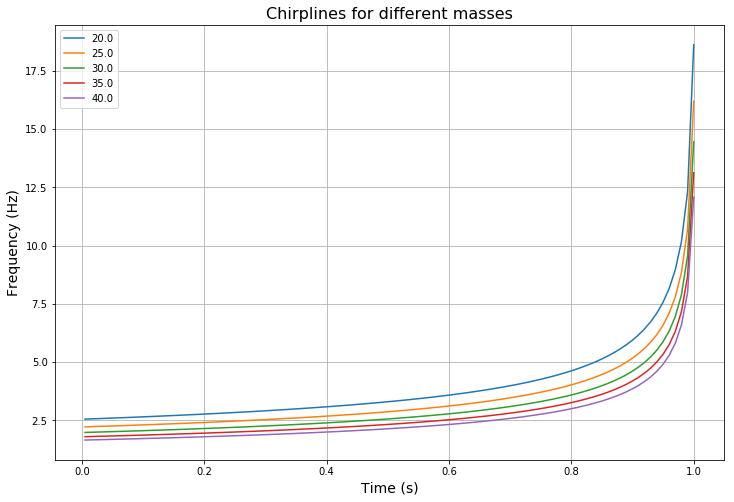

In [147]:
plt.figure(figsize=(12,8))
for i in range(len(chirplines)):
    plt.plot(t_c+t-t[-1],chirplines[i],label=f'{x[i]}')
    
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Frequency (Hz)',fontsize=14)
plt.title('Chirplines for different masses',fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.close()

Plug the chirpline (Eq. 6), and the phase (Eq. 7) into the strain equation (Eq. 2). Ignore the prefactor.
Plot strains h(t) for different values of x. 

In [148]:
# Phase function.
def phase(B,x,t_c,t):
    return 2 * np.pi * B * x**(-5/8) * (-3/8) * (t_c - t)**(5/8)

In [149]:
# Strain function.
def strain(A,eta,M,D,x,t,B,t_c,phi_c):
    return (4 * A * eta * M)/(D) * (np.pi * M * f_GW(x,t,B,t_c)**(2/3) * np.cos(phase(B,x,t_c,t) + phi_c))

In [150]:
# Total mass.
def total_mass(m1,m2):
    return m1+m2

In [151]:
# Reduced mass.
def reduced_mass(m1,m2,M):
    return (m1 * m2) / M**2

In [152]:
# Set variables.
A = 2/5 # Geometric prefactor.
m1 = 20 # Mass 1, solar masses.
m2 = 30 # Mass 2, solar masses.
D = 1 # Luminosity distance of the event.
phi_c = 0
t_c2 = 200
t2 = np.linspace(0,t_c2-0.01,4000)

In [153]:
# Intermediate steps.
M = total_mass(m1,m2)
eta = reduced_mass(m1,m2,M)

In [154]:
strains = []
for i in range(len(x)):
    strains.append(strain(A,eta,M,D,x[i],t2,B,t_c2,phi_c))

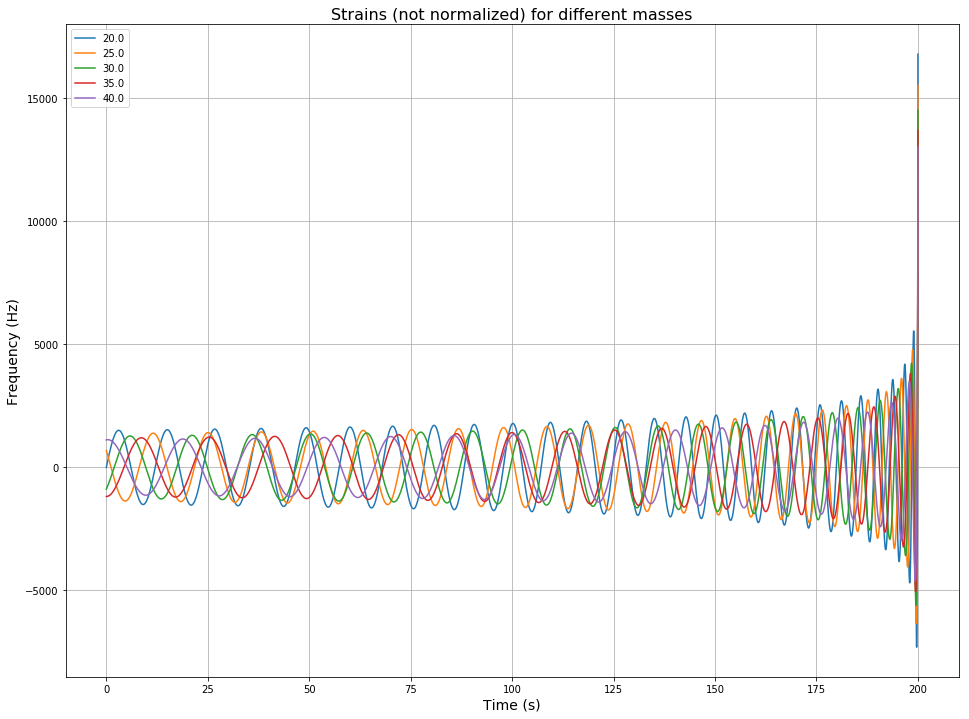

In [155]:
plt.figure(figsize=(16,12))
for i in range(len(strains)):
    plt.plot(t2,strains[i],label=f'{x[i]}')
    
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Frequency (Hz)',fontsize=14)
plt.title('Strains (not normalized) for different masses',fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.close()

### Exercise 2: Creating a template bank for gravitational waves

Gravitational wave detection employs matched filtering, for which a template bank needs to be created first. This bank hosts the variety of potential signal shapes and in this exercise we will learn the essentials of how to create one.

1) **Parameter study**: Keeping all other parameters fixed, which effect does $\phi_c$ have? Keeping all other parameters fixed, which effect does $t_c$ have, and which does $x$ have?

**Answer**:

$\phi_c$. It's just a starting point for the wave. So it determines at what frequency the wave starts. Essentially a phase/linear shift.

$t_c$. Also a linear shift. $t_c$ determines the time of merging so you can choose what you want for this variable.

$x$. A constant, which is in used in expressing the mass of black holes/neutron stars in solar masses.

2) **Prior ranges**: Which natural prior range does $\phi_c$ have? Given the LIGO and VIRGO sensitivities, which sensible prior range can you introduce for $x$?

**Answer**:

$\phi_c$. Since it's inside a $\sin$ function, $0$ to $2 \pi$ seems a good prior.

$x$. It says above in the assignment typical values for $x$ are $20$ to $40$ solar masses. When sampling, try $5$ to a $100$.

3) **Scale and shift symmetries**: Parameters which simply scale an amplitude, and parameters which introduce mere shifts of the signal, are not regarded as real signal parameters in matched filtering. This is because in matched filtering, the amplitude does not determine which signal is detected, but only how significantly it is detected, in relation to the background noise. Shift parameters simply determine where in the data stream a signal is found, but not which signal is found. For the gravitational waves, which parameters are shift and scale parameters?

**Answer**:

Shift parameters: $t_c$.

Scale parameters: $A$, $\eta$, $D$

$\phi_c$ is not a shift parameter, because it does not really shift the signal, it sets the beginning phase. $t_c$ isn't physically related, $\phi_c$ is.

4) **Dimensionality reduction**: Efficient template banks sweep through as few parameters as possible. Currently, Eq. (8) employs six parameters: $m_1$, $m_2$, $A$, $D$, $t_c$, $\phi_c$. These are too many. Investigate Eq. (8), and find out which parameters are degenerate. Show that by replacing degenerate parameters with effective parameters, you can reduce the dimensionality of your template bank from 6 to 2. If you succeed to reduce the dimensionality to 4 or 3 only, reconsider step (3).

**Extra question**: What are *degenerate* and *effective* parameters? Degenerate in this context means redundant and effective, irreplaceable?

**Answer**: The two effective parameters are $\phi_c$ and $x$. $m_1$ and $m_2$ do not occur separately in equation 8, so you don't have to use them both. $A$ and $D$ are scaling parameters so you can just set them to $1$.

5) **Template spacing**: Template spacing describes at which grid points between the prior boundaries templates are (pre-)computed. If the spacing is too large, the templates vary too rapidly and the detection significance will decrease due to template mismatch. If the spacing is too small, the template bank will be slow. Find sensible template spacings for your two parameters, by plotting how rapidly the templates change as you vary the parameters.

**Answer**:

In [156]:
# Equation 8.
def f_h(x,phi_c,t,t_c):
    return (16.6 * x**(-5/8) * (t_c - t)**(-3/8))**(2/3) * np.cos(-39.11 * x**(-5/8) * (t_c - t)**(5/8) + phi_c)

In [157]:
# Set phi_c and x.
x = 20
phi_c = np.linspace(0,np.pi * 2, 9)
t= np.linspace(0,t_c-0.01,10*t_c)
t_c = 100
h = []
for i in range(len(phi_c)):
    h.append(f_h(x,phi_c[i],t,t_c))

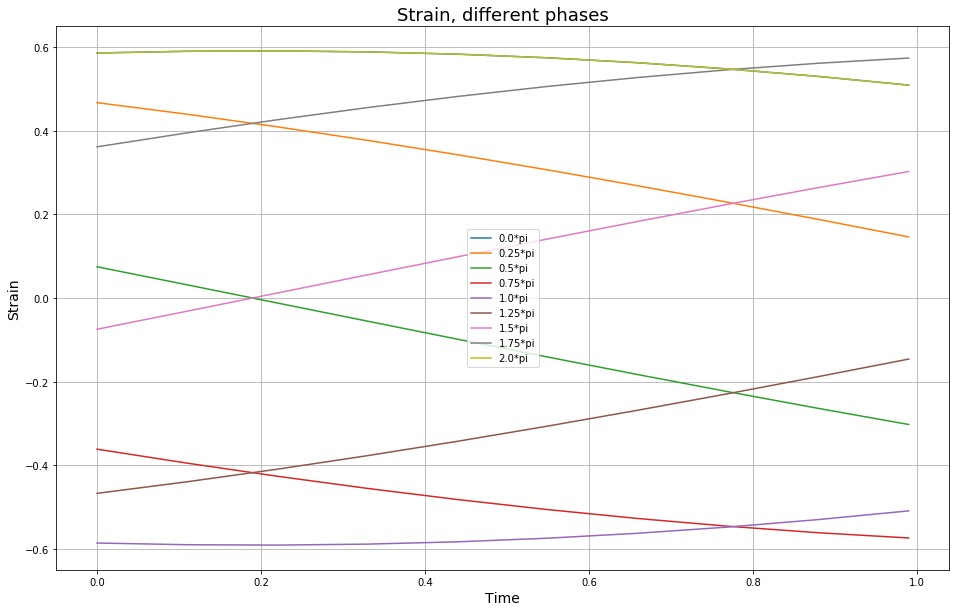

In [158]:
plt.figure(figsize=(16,10))
for i in range(len(h)):
    plt.plot(t,h[i],label=f'{phi_c[i]/np.pi}*pi')
plt.title('Strain, different phases',fontsize=18)
plt.ylabel('Strain',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.close()

In [168]:
# Set phi_c and x.
x = np.linspace(5,100,4)
phi_c = 0
t= np.linspace(0,t_c-0.01,10*t_c)
t_c = 100
h = []
for i in range(len(x)):
    h.append(f_h(x[i],phi_c,t,t_c))
print(np.size(h))

TypeError: only size-1 arrays can be converted to Python scalars

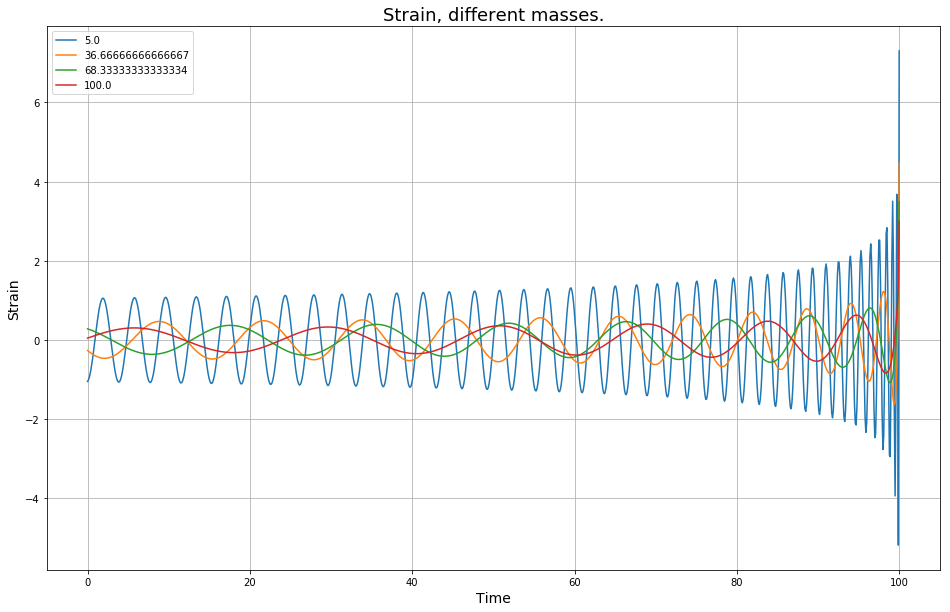

In [160]:
plt.figure(figsize=(16,10))
for i in range(len(h)):
    plt.plot(t,h[i],label=f'{x[i]}')
plt.title('Strain, different masses.',fontsize=18)
plt.ylabel('Strain',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.close()

In [161]:
# Set phi_c and x.
x = 30
phi_c = np.pi/2
t= np.linspace(0,t_c-0.01,100)
t_c = 100
h = f_h(x,phi_c,t,t_c)

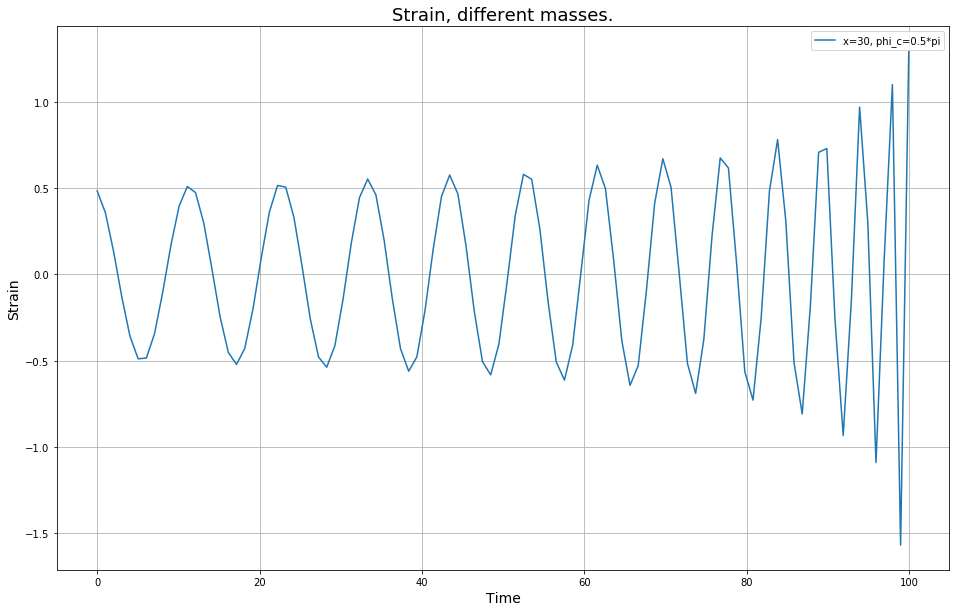

In [162]:
plt.figure(figsize=(16,10))
plt.plot(t,h,label=f'x={x}, phi_c={phi_c/np.pi}*pi')
plt.title('Strain, different masses.',fontsize=18)
plt.ylabel('Strain',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.close()

In [163]:
t_c = np.linspace(90,110,100)
h_filter = []
for i in range(len(t_c)):
    h = f_h(x,phi_c,t,t_c[i])
    h_filter.append(h)

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
print(np.size(h))
print(np.size(h_filter))

100
10000


In [165]:
for i in range(h_filter):
    signal_to_noise = np.dot(h,h_filter[i])

TypeError: 'list' object cannot be interpreted as an integer

### Exercise 3: Filtering data streams for gravitational waves

The file ‘AllWithNoise.dat’ may or may not contain synthetic  gravitational wave signals. These file sample the time $\tau$ regularly (first column), but the initial time has been subtracted. This means the first column is a time-window, where the original  human-time starting point is irrelevant for this exercise. The second, third and fourth columns store the strain $h(\tau)$. The collapse time $t_c$ from Exercise 1 and 2 may take place at any $\tau$, so you will need to shift your signals as a function of $t_c$.

1) Program up the matched-filter equations and sift through the three signals.


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in data.
filepath = 'data/AllWithNoise.dat'
data = np.loadtxt(filepath,delimiter=' ')

# data[0] The time τ, but the initial has been subtracted.
# data[1] The strain h(τ).
# data[2] The strain h(τ).
# data[3] The strain h(τ).

time = data[:,0]
h1 = data[:,1]
h2 = data[:,2]
h3 = data[:,3]

In [ ]:
# Make some plots to see how it looks.
plt.figure(figsize=(16,10))
plt.title('Strain',fontsize=18)
plt.plot(time,h1,label=f'Strain 1')
plt.plot(time,h2,label=f'Strain 2') # Looks similar.
plt.plot(time,h3,label=f'Strain 3') # Looks similar.
plt.xlabel('Time',fontsize=16)
plt.ylabel('Strain',fontsize=16)
plt.legend()
plt.show()
plt.close()

2) Plot the filter output as a function of time. A large spike in the filter output indicates a correlation with the signal.

3) Find out how many gravitational waves are hidden in the three data streams. What are the parameters
(mass, collapse time, amplitude) of these gravitational waves? Give a best-fit and handwavy error
bars. (The full error bars would be determined in the follow-up analysis).


If you wish to restore the original amplitude of the signal, then the noise here added was uncorrelated Gaussian noise of standard deviation $\sigma = 0.2$.